In [28]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import modules.utils as u

# Import des données

In [32]:
raw_df = pd.read_csv('../data/RAW/titanic.csv', dtype={'Sex':'category', 'Name': 'string'})

# Analyse

In [33]:
# montre les 5 premières lignes de votre jeu de données
raw_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,NaN,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1.0,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1.0,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1.0,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0.0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
# Donne des infos statistiques sur notre jeu de données
raw_df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,886.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.386005,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487107,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
# Donne des informations "techniques" sur les différentes colonnes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survived                 886 non-null    float64 
 1   Pclass                   887 non-null    int64   
 2   Name                     887 non-null    string  
 3   Sex                      887 non-null    category
 4   Age                      887 non-null    float64 
 5   Siblings/Spouses Aboard  887 non-null    int64   
 6   Parents/Children Aboard  887 non-null    int64   
 7   Fare                     887 non-null    float64 
dtypes: category(1), float64(3), int64(3), string(1)
memory usage: 49.6 KB


In [ ]:
# Effectuer un filtre sur une colonne
raw_df[raw_df['Sex'] == 'male']

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,NaN,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0.0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0.0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0.0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0.0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
...,...,...,...,...,...,...,...,...
879,0.0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.5000
880,0.0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
882,0.0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
885,1.0,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [ ]:
# Compter le nombre d'élements d'une colonne
raw_df.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [ ]:
# Générer une nouvelle colonne en fonction d'une règle

raw_df['Is Old'] = raw_df.Age > 60

def square(age):
    return age > 60

raw_df['Is Old'] = raw_df.Age.apply(square)
# raw_df['Is Old'] = raw_df.Age.apply(lambda x: x > 60)

raw_df


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Is Old
0,NaN,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,False
1,1.0,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,False
2,1.0,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,False
3,1.0,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,False
4,0.0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,False
...,...,...,...,...,...,...,...,...,...
882,0.0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,False
883,1.0,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,False
884,0.0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,False
885,1.0,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,False


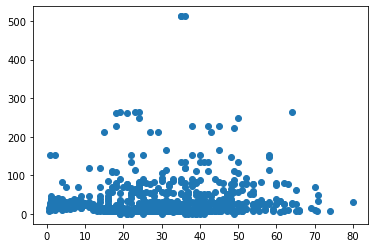

In [ ]:
plt.scatter(raw_df.Age, raw_df.Fare)

<AxesSubplot:>

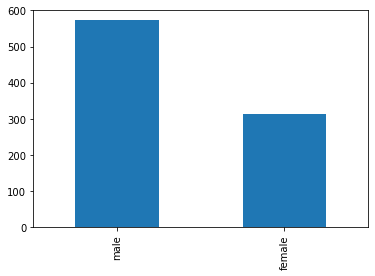

In [ ]:
raw_df.Sex.value_counts().plot(kind='bar')

<AxesSubplot:>

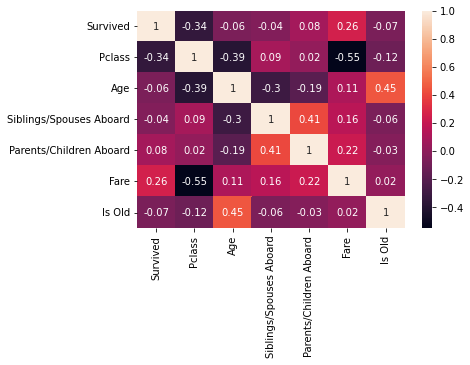

In [ ]:
corr = raw_df.corr().round(2)
sns.heatmap(data=corr, annot=True)

In [ ]:
# Appels d'un fichier .py

text = u.get_dataframe()
print(text)